In [1]:
# Installing required quantum computing libraries
!pip install qiskit qiskit-aer qiskit-ibm-runtime --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.5 MB/s eta 0:00:00


## Required libraries


In [47]:
import math
import hmac
import hashlib
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer

In [24]:
# In this function generates a random string of quantum bits (0s and 1s) of a given length which is 8
def generate_quantum_random_bits(length):
    output = ''
    group_size = 4

    chunks = math.ceil(length / group_size)
    simulator = AerSimulator()

    for _ in range(chunks):
        qreg = QuantumRegister(group_size)
        creg = ClassicalRegister(group_size)
        circuit = QuantumCircuit(qreg, creg)

        for i in range(group_size):
            circuit.h(qreg[i])
        circuit.measure(qreg, creg)

        compiled = transpile(circuit, simulator)
        result = simulator.run(compiled, shots=1, memory=True).result()
        bitstring = result.get_memory()[0]

        output += bitstring

    return output[:length]

In [7]:
msg_length = 8
alice_bits = generate_quantum_random_bits(msg_length)
alice_bases = generate_quantum_random_bits(msg_length)
bob_bases   = generate_quantum_random_bits(msg_length)

print("Alice Bits:   ", alice_bits)
print("Alice Bases:  ", alice_bases)
print("Bob Bases:    ", bob_bases)

Alice Bits:    01100001
Alice Bases:   11000001
Bob Bases:     00000010


In [8]:
# helper fucntion to visuialize circuit
def create_alice_circuit(bits, bases):
    n = len(bits)
    qreg = QuantumRegister(n)
    creg = ClassicalRegister(n)
    circuit = QuantumCircuit(qreg, creg)

    for i in range(n):
        # Encode the bit
        if bits[i] == '1':
            circuit.x(qreg[i])
        # Apply basis
        if bases[i] == '1':
            circuit.h(qreg[i])

    circuit.barrier()
    return circuit

In [9]:
alice_circuit = create_alice_circuit(alice_bits, alice_bases)
alice_circuit.draw('text')

┌───┐      ░ 
q6_0: ┤ H ├──────░─
      ├───┤┌───┐ ░ 
q6_1: ┤ X ├┤ H ├─░─
      ├───┤└───┘ ░ 
q6_2: ┤ X ├──────░─
      └───┘      ░ 
q6_3: ───────────░─
                 ░ 
q6_4: ───────────░─
                 ░ 
q6_5: ───────────░─
                 ░ 
q6_6: ───────────░─
      ┌───┐┌───┐ ░ 
q6_7: ┤ X ├┤ H ├─░─
      └───┘└───┘ ░ 
c6: 8/═════════════

In [10]:
# function applies Bob's measurement operations to the quantum circui based on his randomly chosen bases
def apply_bob_measurement(circuit, bob_bases):
    n = len(bob_bases)
    for i in range(n):
        if bob_bases[i] == '1':
            circuit.h(i)
        circuit.measure(i, i)
    return circuit

In [11]:
full_bb84_circuit = apply_bob_measurement(alice_circuit, bob_bases)

full_bb84_circuit.draw('text')  # or 'mpl'

┌───┐      ░ ┌─┐                       
q6_0: ┤ H ├──────░─┤M├───────────────────────
      ├───┤┌───┐ ░ └╥┘┌─┐                    
q6_1: ┤ X ├┤ H ├─░──╫─┤M├────────────────────
      ├───┤└───┘ ░  ║ └╥┘┌─┐                 
q6_2: ┤ X ├──────░──╫──╫─┤M├─────────────────
      └───┘      ░  ║  ║ └╥┘┌─┐              
q6_3: ───────────░──╫──╫──╫─┤M├──────────────
                 ░  ║  ║  ║ └╥┘┌─┐           
q6_4: ───────────░──╫──╫──╫──╫─┤M├───────────
                 ░  ║  ║  ║  ║ └╥┘┌─┐        
q6_5: ───────────░──╫──╫──╫──╫──╫─┤M├────────
                 ░  ║  ║  ║  ║  ║ └╥┘┌───┐┌─┐
q6_6: ───────────░──╫──╫──╫──╫──╫──╫─┤ H ├┤M├
      ┌───┐┌───┐ ░  ║  ║  ║  ║  ║  ║ └┬─┬┘└╥┘
q6_7: ┤ X ├┤ H ├─░──╫──╫──╫──╫──╫──╫──┤M├──╫─
      └───┘└───┘ ░  ║  ║  ║  ║  ║  ║  └╥┘  ║ 
c6: 8/══════════════╩══╩══╩══╩══╩══╩═══╩═══╩═
                    0  1  2  3  4  5   7   6

In [12]:
# funtion to tun quantum circuit using simulator
from qiskit_aer import AerSimulator

def run_bb84_circuit(circuit):
    simulator = AerSimulator()
    compiled = transpile(circuit, simulator)
    result = simulator.run(compiled, shots=1, memory=True).result()
    raw_output = result.get_memory()[0]
    return raw_output

In [13]:
# function extracts the sifted key based on matching bases between Alice and Bob
def sift_key(alice_bases, bob_bases, bob_results):
    sifted = []
    length = len(alice_bases)

    for i in range(length):
        if alice_bases[i] == bob_bases[i]:
            sifted.append(bob_results[length - 1 - i])

    return ''.join(sifted)

In [14]:
bob_raw_result = run_bb84_circuit(full_bb84_circuit)

shared_key = sift_key(alice_bases, bob_bases, bob_raw_result)

print("Bob’s Measurement:  ", bob_raw_result)
print("Sifted Key:         ", shared_key)
print("Sifted Key Length:  ", len(shared_key))

Bob’s Measurement:   01000110
Sifted Key:          1000
Sifted Key Length:   4


In [15]:
# function runs the BB84 protocol multiple times and tracks how many bits are retained in each trial
def run_multiple_trials(num_trials=100, bit_length=8):
    retention_rates = []

    for _ in range(num_trials):
        # Generate random input
        alice_bits = generate_quantum_random_bits(bit_length)
        alice_bases = generate_quantum_random_bits(bit_length)
        bob_bases = generate_quantum_random_bits(bit_length)

        # Alice encodes → Bob measures
        qc = create_alice_circuit(alice_bits, alice_bases)
        full_circuit = apply_bob_measurement(qc, bob_bases)
        bob_output = run_bb84_circuit(full_circuit)
        sifted_key = sift_key(alice_bases, bob_bases, bob_output)

        retention = (len(sifted_key) / bit_length) * 100
        retention_rates.append(retention)

    return retention_rates

In [16]:
#Visulaization of retention rates
def plot_retention_rates(retention_rates):
    import matplotlib.pyplot as plt
    import numpy as np

    trials = list(range(1, len(retention_rates) + 1))
    avg_retention = np.mean(retention_rates)

    plt.figure(figsize=(10, 6))
    plt.plot(trials, retention_rates, 'o-', markersize=4, label="Trial Retention")
    plt.axhline(y=avg_retention, color='orange', linestyle='--', label=f'Average: {avg_retention:.2f}%')
    plt.axhline(y=50, color='green', linestyle=':', label='Expected: 50%')
    plt.title("BB84 Key Retention over Multiple Trials")
    plt.xlabel("Trial Number")
    plt.ylabel("Retention (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.show()

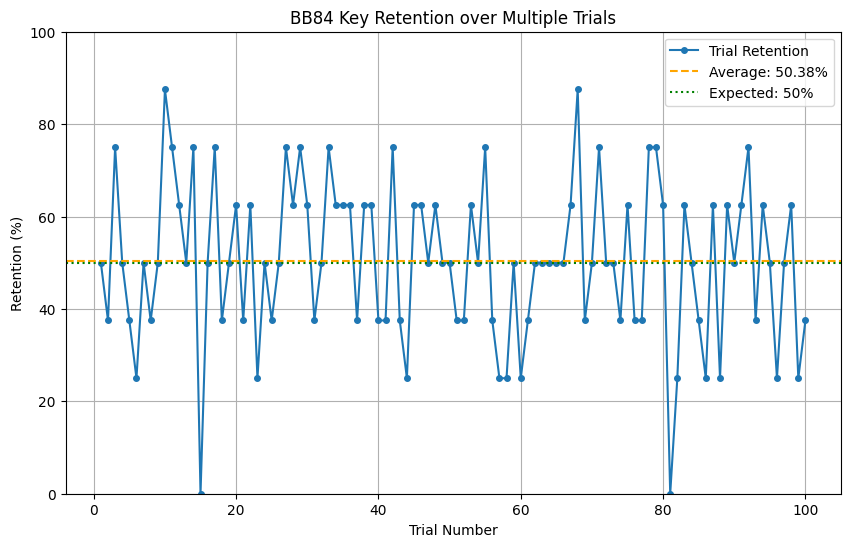

In [17]:
results = run_multiple_trials(num_trials=100, bit_length=8)
plot_retention_rates(results)

In [18]:
# # This function simulates the BB84 protocol with an Eve interfering in the communication

def simulate_bb84_with_eve(bit_length=32):

    alice_bits = generate_quantum_random_bits(bit_length)
    alice_bases = generate_quantum_random_bits(bit_length)
    eve_bases   = generate_quantum_random_bits(bit_length)
    bob_bases   = generate_quantum_random_bits(bit_length)

    q = QuantumRegister(bit_length)
    c = ClassicalRegister(bit_length)
    qc = QuantumCircuit(q, c)

    for i in range(bit_length):
        if alice_bits[i] == '1':
            qc.x(q[i])
        if alice_bases[i] == '1':
            qc.h(q[i])
    qc.barrier()

    for i in range(bit_length):
        if alice_bases[i] != eve_bases[i]:
            qc.z(q[i])
    qc.barrier()

    for i in range(bit_length):
        if bob_bases[i] == '1':
            qc.h(q[i])
        qc.measure(q[i], c[i])

    simulator = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, optimization_level=0)
    result = simulator.run(compiled, shots=1, memory=True).result()
    bob_result = result.get_memory()[0]

    sifted_alice = []
    sifted_bob = []

    for i in range(bit_length):
        if alice_bases[i] == bob_bases[i]:
            sifted_alice.append(alice_bits[i])
            sifted_bob.append(bob_result[bit_length - 1 - i])

    errors = sum(1 for a, b in zip(sifted_alice, sifted_bob) if a != b)
    total = len(sifted_alice)
    qber = (errors / total) * 100 if total > 0 else 0

    return {
        "sifted_key_alice": ''.join(sifted_alice),
        "sifted_key_bob": ''.join(sifted_bob),
        "error_rate": qber,
        "sifted_len": total
    }

In [19]:
from qiskit_aer import Aer
simulator = Aer.get_backend('qasm_simulator')

In [20]:
eve_result = simulate_bb84_with_eve(32)

print("\n--- BB84 with Eve ---")
print("Sifted Key (Alice):", eve_result["sifted_key_alice"])
print("Sifted Key (Bob):  ", eve_result["sifted_key_bob"])
print("QBER (% errors):   ", eve_result["error_rate"])
print("Sifted Key Length: ", eve_result["sifted_len"])


--- BB84 with Eve ---
Sifted Key (Alice): 000111100110111
Sifted Key (Bob):   001011000100101
QBER (% errors):    33.33333333333333
Sifted Key Length:  15


In [21]:
# Simulation without eve
def simulate_bb84_no_eve(bit_length=32):
    alice_bits = generate_quantum_random_bits(bit_length)
    alice_bases = generate_quantum_random_bits(bit_length)
    bob_bases = generate_quantum_random_bits(bit_length)

    q = QuantumRegister(bit_length)
    c = ClassicalRegister(bit_length)
    qc = QuantumCircuit(q, c)

    for i in range(bit_length):
        if alice_bits[i] == '1':
            qc.x(q[i])
        if alice_bases[i] == '1':
            qc.h(q[i])
    qc.barrier()

    for i in range(bit_length):
        if bob_bases[i] == '1':
            qc.h(q[i])
        qc.measure(q[i], c[i])

    from qiskit_aer import Aer
    simulator = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, optimization_level=0)
    result = simulator.run(compiled, shots=1, memory=True).result()
    bob_result = result.get_memory()[0]

    sifted_alice = []
    sifted_bob = []
    for i in range(bit_length):
        if alice_bases[i] == bob_bases[i]:
            sifted_alice.append(alice_bits[i])
            sifted_bob.append(bob_result[bit_length - 1 - i])

    errors = sum(1 for a, b in zip(sifted_alice, sifted_bob) if a != b)
    total = len(sifted_alice)
    qber = (errors / total) * 100 if total > 0 else 0
    return qber

In [22]:
import matplotlib.pyplot as plt

def compare_qber_trials(trials=30, bit_length=32):
    qber_no_eve = []
    qber_with_eve = []

    for _ in range(trials):
        qber_no_eve.append(simulate_bb84_no_eve(bit_length))
        qber_with_eve.append(simulate_bb84_with_eve(bit_length)['error_rate'])

    plt.figure(figsize=(10, 6))
    plt.plot(qber_no_eve, label='QBER (No Eve)', color='green', marker='o')
    plt.plot(qber_with_eve, label='QBER (With Eve)', color='red', marker='x')
    plt.axhline(y=15, color='gray', linestyle='--', label='Eavesdropping Threshold')
    plt.title('Quantum Bit Error Rate Comparison (With vs Without Eve)')
    plt.xlabel('Trial Number')
    plt.ylabel('QBER (%)')
    plt.ylim(0, 100)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

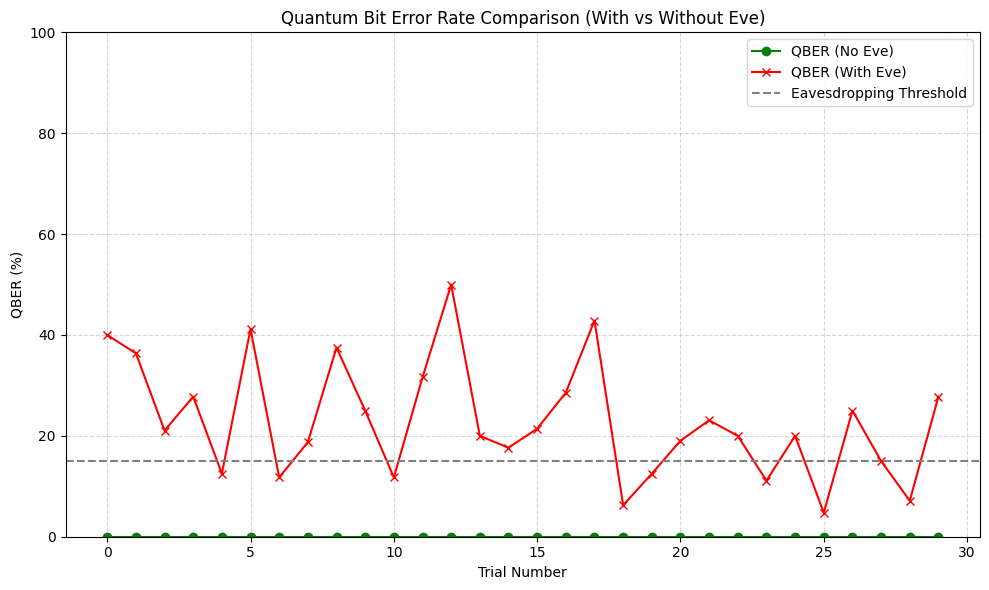

In [23]:
compare_qber_trials(trials=30, bit_length=32)

In [25]:
# function generates a fixed length pseudorandom binary string using HMAC

def hmac_prf(secret_key: str, message: bytes, output_length=16) -> str:
    h = hmac.new(secret_key.encode(), message, hashlib.sha256).hexdigest()
    binary = bin(int(h, 16))[2:].zfill(256)
    return binary[:output_length]

In [26]:
def binary_concat(*args) -> bytes: # function joins multiple binary or string inputs into a single byte sequence
    return b''.join(arg.encode() if isinstance(arg, str) else arg for arg in args)

In [27]:
def update_key_and_seed(K: str, S: str): # updates the shared key (K) and seed (S) using HMAC
    new_K = hmac_prf(K, b"update_key")
    new_S = hmac_prf(S, b"update_seed")
    return new_K, new_S

In [28]:
# Here i generates the next value of T using the current key, seed, previous T and round number
def generate_next_T(K: str, S: str, prev_T: str, round_num: int):
    counter = round_num.to_bytes(1, byteorder='big')
    return hmac_prf(K, binary_concat(prev_T, S, counter))

In [29]:
# fucntion to simulate hmac rounds
def simulate_hmac_key_rounds(num_rounds=3):
    K = "shared_secret_key"
    S = "shared_seed"
    T = "0000000000000000"

    print("HMAC Key & Seed Evolution:")
    for round_num in range(1, num_rounds + 1):
        print(f"\n Round {round_num}")
        print("Previous K:", K)
        print("Previous S:", S)

        T = generate_next_T(K, S, T, round_num)
        print("Generated T:", T)

        K, S = update_key_and_seed(K, S)
        print("Updated K:", K)
        print("Updated S:", S)

In [30]:
simulate_hmac_key_rounds(num_rounds=3)

HMAC Key & Seed Evolution:

 Round 1
Previous K: shared_secret_key
Previous S: shared_seed
Generated T: 0100100001110000
Updated K: 1100100011101110
Updated S: 0111010110100001

 Round 2
Previous K: 1100100011101110
Previous S: 0111010110100001
Generated T: 1111000000011001
Updated K: 0000101111100101
Updated S: 1001000010010111

 Round 3
Previous K: 0000101111100101
Previous S: 1001000010010111
Generated T: 1010010001010010
Updated K: 1101011100010101
Updated S: 0001110001101110


In [31]:
# Converts a given text message into binary format, 8 bits per character
def text_to_binary(text):
    return ''.join(format(ord(c), '08b') for c in text)

# Converts binary data back into human text
def binary_to_text(binary):
    return ''.join(chr(int(binary[i:i+8], 2)) for i in range(0, len(binary), 8)

# Encrypts a message using the one time pad technique (XOR with key)
def otp_encrypt(message, key):
    message_bin = text_to_binary(message)
    encrypted = ''.join(str(int(b) ^ int(key[i % len(key)])) for i, b in enumerate(message_bin))
    return encrypted

# Decrypts a ciphertext using the same key with one time pad technique
def otp_decrypt(ciphertext, key):
    decrypted_bin = ''.join(str(int(c) ^ int(key[i % len(key)])) for i, c in enumerate(ciphertext))
    return binary_to_text(decrypted_bin)

In [32]:
message = "Hello quantum world!" # message i want to securely send

required_bits = len(message) * 8

max_attempts = 10
attempt = 0
shared_key = ""

while len(shared_key) < required_bits and attempt < max_attempts:
    bb84_result = simulate_bb84_with_eve(512)
    shared_key = bb84_result['sifted_key_bob']
    attempt += 1

if len(shared_key) < required_bits:
    raise ValueError("Still not enough bits after multiple tries.")

ciphertext = otp_encrypt(message, shared_key)
decrypted = otp_decrypt(ciphertext, shared_key)

print("Encrypted Binary:", ciphertext[:64] + "...")
print("Decrypted Message:", decrypted)

Encrypted Binary: 1110000001001010110010110110100000111000001010011010111101101101...
Decrypted Message: Hello quantum world!
